# 6.Proje-Havayolu Şirketi Yolcu Memnuniyeti

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [7]:
df=pd.read_csv("train.csv")

In [8]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


Veri seti, havayolu müşterilerinin çeşitli özelliklerini içeriyor. İşte bu veri setindeki sütunların açıklamaları:

1. **Unnamed: 0**: Satır numarasını temsil eden bir sütun. Genellikle indeks sütunu olarak kullanılır.

2. **id**: Müşterinin benzersiz kimlik numarası veya müşteri numarası.

3. **Gender**: Müşterinin cinsiyeti (Male/Female).

4. **Customer Type**: Müşterinin türü (Loyal Customer/disloyal Customer). Sadık müşteri veya sadık olmayan müşteri.

5. **Age**: Müşterinin yaşı.

6. **Type of Travel**: Seyahatin türü (Personal Travel/Business Travel). Kişisel seyahat veya iş seyahati.

7. **Class**: Uçuş sınıfı (Eco/Eco Plus/Business).

8. **Flight Distance**: Uçuş mesafesi.

9. **Inflight wifi service**: Uçuş sırasında wifi hizmetinin memnuniyet düzeyi.

10. **Departure/Arrival time convenient**: Kalkış ve varış zamanının uygunluğu hakkındaki memnuniyet düzeyi.

11. **Ease of Online booking**: Online rezervasyon kolaylığı hakkındaki memnuniyet düzeyi.

12. **Gate location**: Kapı konumu hakkındaki memnuniyet düzeyi.

13. **Food and drink**: Yemek ve içecek hizmeti hakkındaki memnuniyet düzeyi.

14. **Online boarding**: Online check-in hizmeti hakkındaki memnuniyet düzeyi.

15. **Seat comfort**: Koltuk konforu hakkındaki memnuniyet düzeyi.

16. **Inflight entertainment**: Uçuş sırasındaki eğlence hizmeti hakkındaki memnuniyet düzeyi.

17. **On-board service**: Uçuş sırasındaki hizmet hakkındaki memnuniyet düzeyi.

18. **Leg room service**: Ayak bölgesinin genişliği hakkındaki memnuniyet düzeyi.

19. **Baggage handling**: Bagaj hizmeti hakkındaki memnuniyet düzeyi.

20. **Check-in service**: Check-in hizmeti hakkındaki memnuniyet düzeyi.

21. **Inflight service**: Uçuş sırasındaki hizmet hakkındaki memnuniyet düzeyi.

22. **Cleanliness**: Uçak temizliği hakkındaki memnuniyet düzeyi.

23. **Departure Delay in Minutes**: Kalkışta gecikme süresi (dakika cinsinden).

24. **Arrival Delay in Minutes**: Varışta gecikme süresi (dakika cinsinden).

25. **Satisfaction**: Müşteri memnuniyeti seviyesini ifade eden bir sütun (satisfied: memnun, neutral or dissatisfied: tarafsız veya memnun değil).

Bu veri seti, havayolu müşterilerinin deneyimlerini ve memnuniyet seviyelerini ölçen çeşitli özellikleri içerir. Analizler veya tahminler yapmak için bu veriyi kullanabilirsiniz, özellikle müşteri memnuniyetini artırmak veya olumsuz deneyimleri azaltmak istiyorsanız.

In [12]:
df = df.drop(["Unnamed: 0", "id"], axis=1)

In [13]:
df.shape

(103904, 23)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [34]:
# Bütün değerlere bu kodda bakabiliriz:
df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [18]:
df.replace({'Gender':{'Male':0,'Female':1}}, inplace= True)

In [23]:
df.replace({'Customer Type':{'Loyal Customer':1, 'disloyal Customer':0}}, inplace= True)

In [27]:
df.replace({'Class':{'Business': 2, 'Eco':1, 'Eco Plus': 0}}, inplace= True)

In [31]:
df.replace({'Type of Travel':{'Business travel': 1,'Personal Travel':0}}, inplace= True)

In [35]:
df.replace({'satisfaction':{'neutral or dissatisfied': 0,'satisfied':1}}, inplace= True)

Artık bütün veriler sayısal değerlere dönüştü. İstatistik, Korelasyon bilgilerine bakıp görselleştirdikten sonra modelleme yapılabilir

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,103904.0,0.507459,0.499947,0.0,0.0,1.0,1.0,1.0
Customer Type,103904.0,0.817322,0.386404,0.0,1.0,1.0,1.0,1.0
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Type of Travel,103904.0,0.689627,0.462649,0.0,0.0,1.0,1.0,1.0
Class,103904.0,1.405865,0.620799,0.0,1.0,1.0,2.0,2.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0


In [38]:
df.corr()["satisfaction"].sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503557
Class                                0.449321
Type of Travel                       0.449000
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Customer Type                        0.187638
Ease of Online booking               0.171705
Age                                  0.137167
Gate location                        0.000682
Gender                              -0.012211
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient 

"Satisfaction" ile diğer sütunlar arasındaki korelasyonlarla ilgili:

- "Online boarding" sütunu ile "Satisfaction" arasındaki pozitif korelasyon (0.503557), online check-in işlemi sırasında memnuniyetin arttığını gösterebilir. Yani, online check-in işlemiyle daha yüksek memnuniyet düzeyleri arasında bir ilişki olabilir.

- "Class" sütunu ile "Satisfaction" arasındaki korelasyon (0.449321), yolcu sınıfının ve memnuniyetin pozitif bir ilişkisi olduğunu gösterebilir. Yani, daha yüksek sınıftaki seyahatler genellikle daha yüksek memnuniyet düzeyleri ile ilişkilendirilebilir.

- "Inflight entertainment" sütunu ile "Satisfaction" arasındaki pozitif korelasyon (0.398059), uçuş sırasında sunulan eğlence seçeneklerinin memnuniyeti artırabileceğini gösterebilir.

- Diğer sütunlardaki pozitif korelasyonlar da benzer şekilde ilişkileri yansıtır. Örneğin, "Seat comfort," "Leg room service," ve "Cleanliness" gibi faktörlerin artan memnuniyetle ilişkili olduğunu gösterir.

Bu değerlendirmeler, "Satisfaction" ile diğer sütunlar arasındaki ilişkinin anlamını ve yönünü açıklar. Pozitif korelasyonlar, iki değişkenin birlikte arttığını gösterirken, negatif korelasyonlar ise bir değişkenin artarken diğerinin azaldığını gösterir. Ancak unutmayın ki korelasyon, nedensel bir ilişkiyi göstermez; yalnızca iki değişken arasındaki ilişkinin gücünü ve yönünü ölçer.

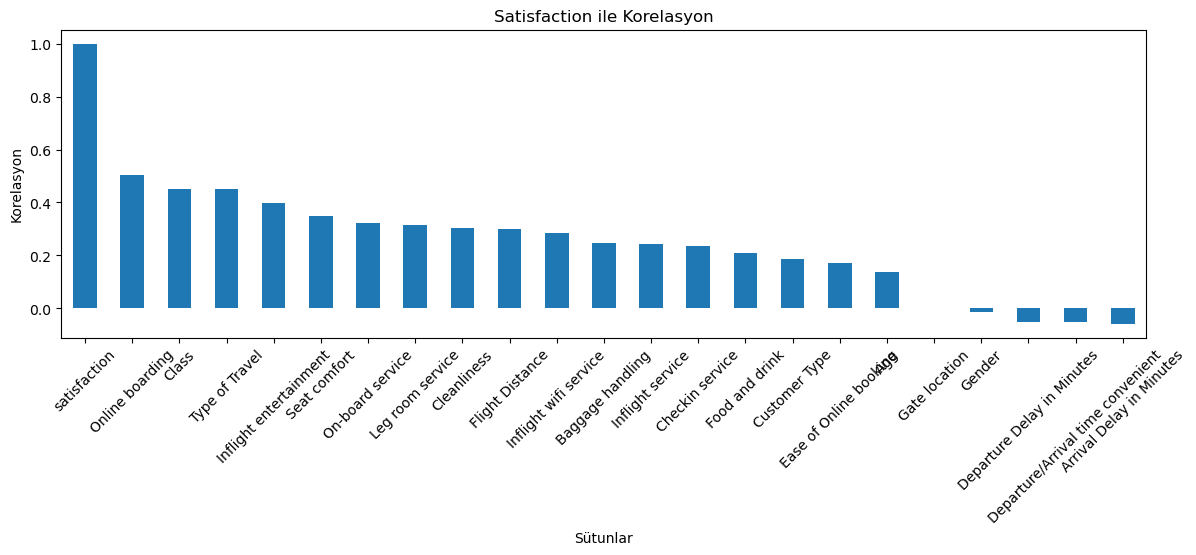

In [41]:
# Korelasyon değerleri
correlations = df.corr()["satisfaction"].sort_values(ascending=False)
# Görselleştirme
plt.figure(figsize=(14, 4))
correlations.plot(kind="bar")
plt.title("Satisfaction ile Korelasyon")
plt.xlabel("Sütunlar")
plt.ylabel("Korelasyon")
plt.xticks(rotation=45)
plt.show()

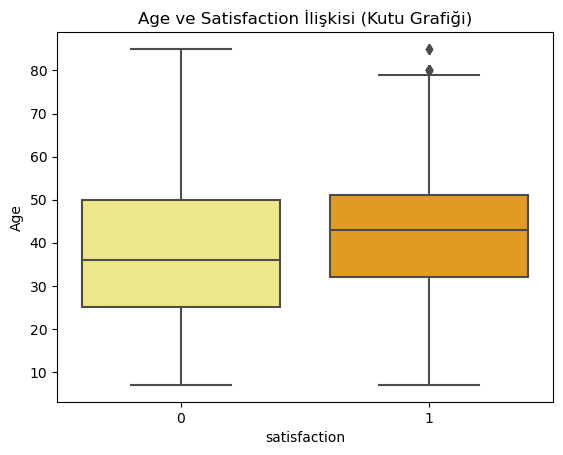

In [55]:
colors = ["#fff678", "orange"]
sns.boxplot(x="satisfaction", y="Age", data=df, palette=colors)
plt.title("Age ve Satisfaction İlişkisi (Kutu Grafiği)")
plt.show()

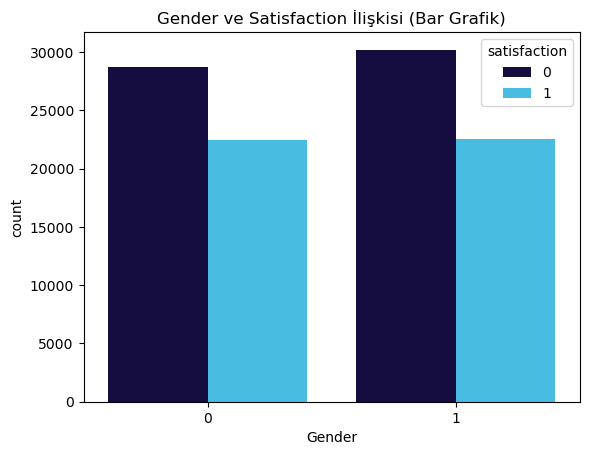

In [53]:
colors = ["#100447", "#2fcbfa"]
sns.countplot(x="Gender", hue="satisfaction", data=df, palette=colors)
plt.title("Gender ve Satisfaction İlişkisi (Bar Grafik)")
plt.show()

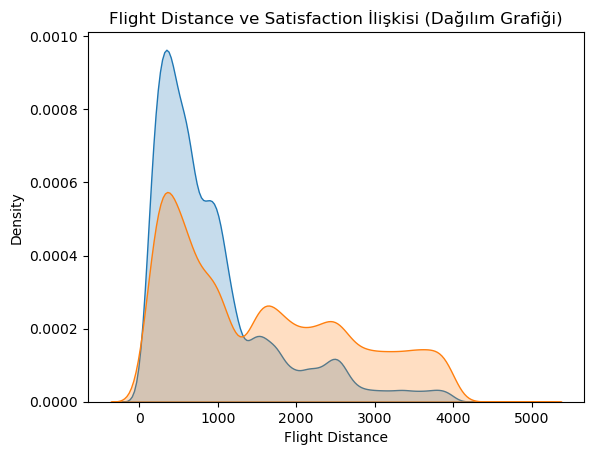

In [46]:
sns.kdeplot(df[df['satisfaction'] == 0]['Flight Distance'], label="Dissatisfied", shade=True)
sns.kdeplot(df[df['satisfaction'] == 1]['Flight Distance'], label="Satisfied", shade=True)
plt.title("Flight Distance ve Satisfaction İlişkisi (Dağılım Grafiği)")
plt.show()

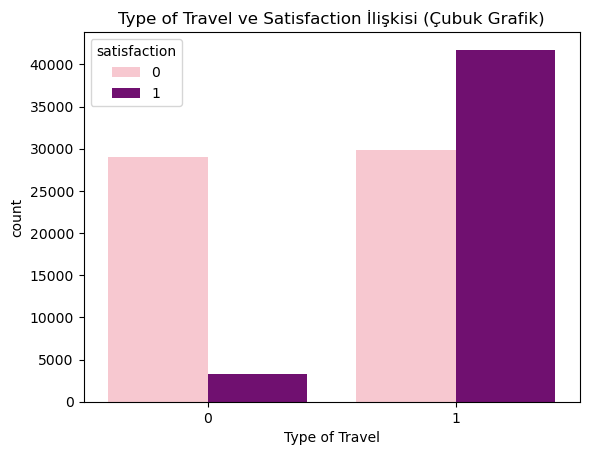

In [52]:
colors = ["pink", "purple"]
sns.countplot(x="Type of Travel", hue="satisfaction", data=df, palette=colors)
plt.title("Type of Travel ve Satisfaction İlişkisi (Çubuk Grafik)")
plt.show()

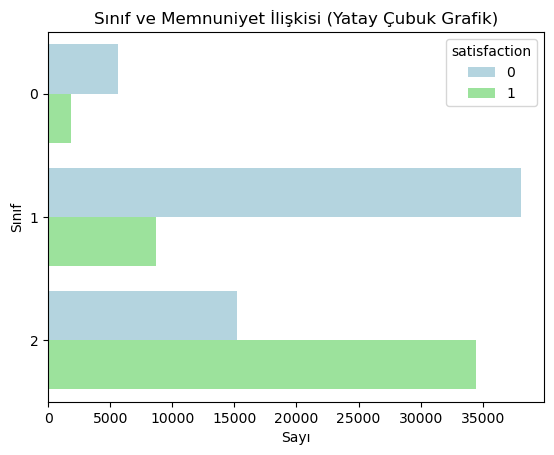

In [51]:
# Sınıf (Class) ve Memnuniyet (Satisfaction) arasındaki ilişkiyi gösteren yatay çubuk grafiği
# Renk paletini tanımla
colors = ["lightblue", "lightgreen"]

# Sınıf (Class) ve Memnuniyet (Satisfaction) arasındaki ilişkiyi gösteren yatay çubuk grafiği
sns.countplot(y="Class", hue="satisfaction", data=df, palette=colors)
plt.title("Sınıf ve Memnuniyet İlişkisi (Yatay Çubuk Grafik)")
plt.ylabel("Sınıf")
plt.xlabel("Sayı")
plt.show()

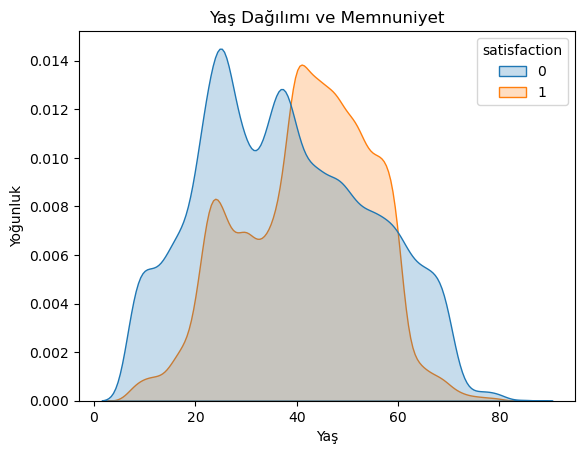

In [57]:
sns.kdeplot(data=df, x='Age', hue='satisfaction', fill=True)
plt.title("Yaş Dağılımı ve Memnuniyet")
plt.xlabel("Yaş")
plt.ylabel("Yoğunluk")
plt.show()

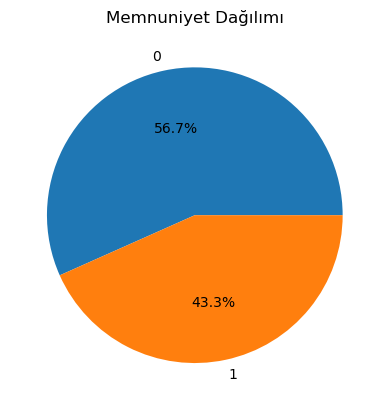

In [58]:
satisfaction_counts = df['satisfaction'].value_counts()
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%')
plt.title("Memnuniyet Dağılımı")
plt.show()

In [70]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [77]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Gördüğümüz gibi dakika olarak Varış Gecikmesinde eksik veriler var. Bunları uygun değerlerle doldurabilirz yada önemine göre çıkarabiliriz.

In [78]:
pd.set_option('display.max_rows', None)
df["Arrival Delay in Minutes"].value_counts()

0.0       58159
1.0        2211
2.0        2064
3.0        1952
4.0        1907
5.0        1658
6.0        1616
7.0        1481
8.0        1394
9.0        1264
10.0       1181
11.0       1129
12.0       1070
13.0       1058
14.0        954
15.0        861
16.0        836
17.0        831
18.0        742
19.0        699
21.0        650
20.0        645
24.0        582
22.0        576
23.0        575
26.0        524
27.0        508
25.0        505
30.0        445
28.0        439
29.0        416
33.0        366
36.0        362
31.0        357
34.0        356
32.0        351
38.0        326
35.0        316
37.0        307
40.0        297
39.0        297
41.0        283
44.0        264
42.0        257
43.0        230
46.0        230
45.0        227
48.0        205
49.0        205
52.0        201
51.0        198
47.0        198
53.0        195
50.0        186
57.0        173
55.0        171
56.0        168
60.0        161
58.0        153
54.0        149
61.0        147
59.0        146
62.0    

In [79]:
# Median ile dolduruyoruz
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median())

In [92]:
# Modelleme:
x = df.drop('satisfaction', axis = 1)
y = df['satisfaction']

In [82]:
def fnc_all_classification_models(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
   
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [83]:
fnc_all_classification_models(x,y)

,accuracy_score
RandomForestClassifier,0.962562
XGBClassifier,0.962418
DecisionTreeClassifier,0.946778
GaussianNB,0.865695
BernoulliNB,0.788846
LogisticRegression,0.763726
KNeighborsClassifier,0.747558
SVC,0.668736


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Random Forest modelini oluşturun ve eğitin
clf = RandomForestClassifier()
clf.fit(x,y)

# Tahminleri yapın
y_pred = clf.predict(x)

# Tahminleri "pred_sat" sütununda saklayın
df["pred_sat"] = y_pred

In [98]:
final_df = df[["satisfaction", "pred_sat"]]
final_df.sample(9)

,satisfaction,pred_sat
48660,0,0
35061,0,0
103264,0,0
38260,1,1
28696,1,1
50864,1,1
90599,1,1
19515,1,1
41675,1,1


In [ ]:
# Random Forest Algoritmamız %96 oranla doğru tahmin etti.